# Titanic - Classification

## Principle of classification

Supervised methods = Adjusting a predictive model from examples. This predictive model is the output of supervised learning (input = examples; output = predictive model).

Supervised methods in ML include classification (cf. this exercise about titanic) and regression (cf. house prices in Boston).

Classification: In the case of supervised learning, we have a training database with characteristics of each feature. The output of classification is a class for each sample: output of predictive model = class = a discrete value = label. The class is discrete.

Example with titanic exercise: 

Predictive model:

    - Input = Characteristics (sex, social class, etc...)
    
    - Output = class (class alive or class dead = label alive / label dead => Discrete values) 

Example: The model will indicate if a picture is a cat or a dog, not the number of cats/dogs.

## Definition of the problem

The main goal of this exercise is to predict if a person would be alive of dead based on the different features with their corresponding characteristics in the dataset.

## Problematic

How to build a model which predicts if a passenger survived the Titanic shipwreck? 

## Resolution approaches

Classification -> Testing different classification models (decision trees, random forest classifier, SVM, Naive Bayes, kNN, logistic regression).

Metrics used to evaluate the performance of a model:

- Accuracy
- Precision
- Recall
- F1 score

## Parameters

## Hypothesis

- 1st try: We kept all columns and we applied specific choices to fill missing values.

## Questions to ask:

1. Would it be possible to explain how each algorithm works? In which context could we use it?
2. What are ROC curves and AUC? In which context could we use them?

## Import modules and load files

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
## Decision tree
from sklearn import tree
from sklearn import metrics
## Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
## kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestNeighbors

# Visualizing Decision Trees
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
#import pydotplus

%matplotlib inline

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# SVM
from sklearn import svm

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# plot ROC Curve
from sklearn.metrics import roc_curve

# compute ROC AUC
from sklearn.metrics import roc_auc_score

# calculate cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score

# Classifier comparison
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
gender = pd.read_csv("../data/raw/titanic/gender_submission.csv")
gender.info()
gender.head()

In [3]:
train = pd.read_csv("../data/raw/titanic/train.csv")
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv("../data/raw/titanic/test.csv") # dataset used by Kaggle to evaluate our model performance egal to everyone
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train["Sex"].unique()

In [ ]:
train["Pclass"].unique()

In [ ]:
train["Embarked"].unique()

In [ ]:
fig = px.histogram(train, x = "Sex", color = "Survived", barmode = "group", title = "Proportions of men and women who survived and died")
fig.show()

In [ ]:
fig = px.histogram(train, x = "Sex", color = "Survived", barmode = "group", facet_col = "Pclass",
                  title = "Proportions of men and women who survived and died according to their social class")
fig.show()

In [ ]:
fig = px.histogram(train, x = "Embarked", color = "Survived", barmode = "group", facet_col = "Pclass",
                  title = "Proportions of people who survived and died according to the embarked place and their social class")
fig.show()

In [ ]:
fig = px.histogram(train, x = "Embarked", color = "Sex", barmode = "group", facet_col = "Pclass",
                  title="Repartition of men and women in different embarked places according to their social class")
fig.show()

## Data preprocessing

In [5]:
# Separating the features and the target (Survived)
X = train.drop(columns = ["Survived"])
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
y = train["Survived"]
y.info()
y.head()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
# Splitting the train dataset, to evaluate my model's performance
# Good practice: splitting the earlier as possible, to avoid that data from dataset could be found in the test dataset
# ex: filling missing data with mean of all data of the whole "Age" column: calculate the mean in the train dataset and report in
# in the test one
# ex: Embarked: missing values at 0 => to verify the impact on the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42
)

# Random_state: generating random nb => algo generating pseudo-random nb (in info, all is deterministic). To add an external random notion, this algo 
# takes a seed to initialize the algo. 
# => For a given seed, we will always have the same generated random nb sequence.
# Here, in this function, the random-state parameter is the seed (parameter of random nb)
# => Here, we determine in advance which will be the repartition between the train and the test, ie the result that we have today is exactly the same
# result as the one we obtained a few months ago.
# => Reproducibility

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

In [8]:
def apply_male_int(sex):
    if sex == "male":
        sex = 1
    else:
        sex = 0
    return sex

In [9]:
X_train["male"] = X_train["Sex"].apply(apply_male_int)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          478 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 60.5+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,1
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,1
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0


In [10]:
def apply_Pclass_int(Pclass):
    if Pclass != 1:
        Pclass = 0
    return Pclass

In [11]:
X_train["Pclass1"] = X_train["Pclass"].apply(apply_Pclass_int)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          478 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 65.2+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,1,0
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,1,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0,0


In [12]:
def apply_Pclass(Pclass):
    if Pclass != 2:
        Pclass = 0
    else:
        Pclass = 1
    return Pclass

In [13]:
X_train["Pclass2"] = X_train["Pclass"].apply(apply_Pclass)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          478 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 69.8+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1,0
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,1,0,0
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,1,0,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0,0,0


In [14]:
def apply_Pclass_last(Pclass):
    if Pclass != 3:
        Pclass = 0
    else:
        Pclass = 1
    return Pclass

In [15]:
X_train["Pclass3"] = X_train["Pclass"].apply(apply_Pclass_last)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          478 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 74.5+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1,0,0
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,1,0,0,1
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,1,0,0,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0,0,0,1


In [16]:
# replacing NaN values by the mean of the column in Age one
X_train["Age"].unique()

array([54.  ,   nan, 25.  , 26.  , 22.  , 31.  , 49.  , 19.  , 24.  ,
       16.  , 39.  , 47.  , 60.  , 27.  , 38.  , 44.  , 21.  , 45.  ,
        8.  , 32.  , 50.  , 23.  , 15.  , 28.  , 41.  , 33.  , 52.  ,
       20.  ,  9.  , 43.  , 17.  , 37.  , 62.  , 46.  , 29.  , 56.  ,
       59.  , 58.  ,  3.  , 30.  , 28.5 , 36.  ,  0.75, 35.  , 55.  ,
       51.  ,  2.  , 14.  , 45.5 ,  4.  , 40.5 , 40.  , 18.  , 12.  ,
       11.  ,  1.  ,  7.  , 70.5 , 34.  , 70.  , 42.  , 48.  , 80.  ,
       55.5 , 14.5 , 10.  , 53.  , 32.5 , 74.  , 64.  ,  6.  ,  5.  ,
       24.5 ,  0.42, 61.  ,  0.67, 13.  ,  0.83])

In [17]:
mean_age = X_train["Age"].mean()
mean_age

np.float64(29.525983263598327)

In [18]:
X_train["Age"].fillna(mean_age, inplace = True)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          596 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 74.5+ KB


/tmp/ipykernel_8642/604547327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["Age"].fillna(mean_age, inplace = True)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,1,0,0
718,719,3,"McEvoy, Mr. Michael",male,29.525983,0,0,36568,15.5000,NaN,Q,1,0,0,1
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.000000,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.000000,1,0,2680,14.4542,NaN,C,1,0,0,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,NaN,S,0,0,0,1


In [19]:
def apply_embarked_S(embarked):
    if embarked != "S":
        embarked = 0
    else:
        embarked = 1
    return embarked

In [20]:
X_train["Embarked_S"] = X_train["Embarked"].apply(apply_embarked_S)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          596 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
 15  Embarked_S   596 non-null    int64  
dtypes: float64(2), int64(9), object(5)
memory usage: 79.2+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,1,0,0,1
718,719,3,"McEvoy, Mr. Michael",male,29.525983,0,0,36568,15.5000,NaN,Q,1,0,0,1,0
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.000000,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.000000,1,0,2680,14.4542,NaN,C,1,0,0,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,NaN,S,0,0,0,1,1


In [21]:
def apply_embarked_Q(embarked):
    if embarked != "Q":
        embarked = 0
    else:
        embarked = 1
    return embarked

In [22]:
X_train["Embarked_Q"] = X_train["Embarked"].apply(apply_embarked_Q)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          596 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
 15  Embarked_S   596 non-null    int64  
 16  Embarked_Q   596 non-null    int64  
dtypes: float64(2), int64(10), object(5)
memory usage: 83.8+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,1,0,0,1,0
718,719,3,"McEvoy, Mr. Michael",male,29.525983,0,0,36568,15.5000,NaN,Q,1,0,0,1,0,1
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.000000,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0,0,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.000000,1,0,2680,14.4542,NaN,C,1,0,0,1,0,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,NaN,S,0,0,0,1,1,0


In [23]:
def apply_embarked_C(embarked):
    if embarked != "C":
        embarked = 0
    else:
        embarked = 1
    return embarked

In [24]:
X_train["Embarked_C"] = X_train["Embarked"].apply(apply_embarked_C)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          596 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
 15  Embarked_S   596 non-null    int64  
 16  Embarked_Q   596 non-null    int64  
 17  Embarked_C   596 non-null    int64  
dtypes: float64(2), int64(11), object(5)
memory usage: 88.5+

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q,Embarked_C
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,1,0,0,1,0,0
718,719,3,"McEvoy, Mr. Michael",male,29.525983,0,0,36568,15.5000,NaN,Q,1,0,0,1,0,1,0
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.000000,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0,0,0,1
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.000000,1,0,2680,14.4542,NaN,C,1,0,0,1,0,0,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,NaN,S,0,0,0,1,1,0,0


In [25]:
X_train = X_train.drop(columns = ["Name", "Sex", "Ticket", "Cabin", "Embarked"])
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Age          596 non-null    float64
 3   SibSp        596 non-null    int64  
 4   Parch        596 non-null    int64  
 5   Fare         596 non-null    float64
 6   male         596 non-null    int64  
 7   Pclass1      596 non-null    int64  
 8   Pclass2      596 non-null    int64  
 9   Pclass3      596 non-null    int64  
 10  Embarked_S   596 non-null    int64  
 11  Embarked_Q   596 non-null    int64  
 12  Embarked_C   596 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 65.2 KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q,Embarked_C
6,7,1,54.000000,0,0,51.8625,1,1,0,0,1,0,0
718,719,3,29.525983,0,0,15.5000,1,0,0,1,0,1,0
685,686,2,25.000000,1,2,41.5792,1,0,1,0,0,0,1
73,74,3,26.000000,1,0,14.4542,1,0,0,1,0,0,1
882,883,3,22.000000,0,0,10.5167,0,0,0,1,1,0,0


In [26]:
# same transformations on the X_test dataset
X_test["male"] = X_test["Sex"].apply(apply_male_int)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          236 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 30.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,1
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,0


In [27]:
X_test["Pclass1"] = X_test["Pclass"].apply(apply_Pclass_int)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          236 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 32.3+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,0,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,0,0


In [28]:
X_test["Pclass2"] = X_test["Pclass"].apply(apply_Pclass)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          236 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 34.6+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1,0,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1,0,1
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,0,0,1
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,0,0,0


In [29]:
X_test["Pclass3"] = X_test["Pclass"].apply(apply_Pclass_last)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          236 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 36.9+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1,0,0,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,0,0,1,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,0,0,0,1


In [30]:
X_test["Age"].fillna(mean_age, inplace = True)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          295 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 36.9+ KB


/tmp/ipykernel_8642/3476522694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test["Age"].fillna(mean_age, inplace = True)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.525983,1,1,2661,15.2458,NaN,C,1,0,0,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S,0,0,1,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,0,0,0,1


In [31]:
X_test["Embarked_S"] = X_test["Embarked"].apply(apply_embarked_S)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          295 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
 15  Embarked_S   295 non-null    int64  
dtypes: float64(2), int64(9), object(5)
memory usage: 39.2+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.525983,1,1,2661,15.2458,NaN,C,1,0,0,1,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0,1
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1,1
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S,0,0,1,0,1
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,0,0,0,1,0


In [32]:
X_test["Embarked_Q"] = X_test["Embarked"].apply(apply_embarked_Q)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          295 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
 15  Embarked_S   295 non-null    int64  
 16  Embarked_Q   295 non-null    int64  
dtypes: float64(2), int64(10), object(5)
memory usage: 41.5+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.525983,1,1,2661,15.2458,NaN,C,1,0,0,1,0,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0,1,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1,1,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S,0,0,1,0,1,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,0,0,0,1,0,0


In [33]:
X_test["Embarked_C"] = X_test["Embarked"].apply(apply_embarked_C)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          295 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
 15  Embarked_S   295 non-null    int64  
 16  Embarked_Q   295 non-null    int64  
 17  Embarked_C   295 non-null    int64  
dtypes: float64(2), int64(11), object(5)
memory usage: 43.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q,Embarked_C
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.525983,1,1,2661,15.2458,NaN,C,1,0,0,1,0,0,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0,1,0,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1,1,0,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S,0,0,1,0,1,0,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,0,0,0,1,0,0,1


In [34]:
X_test = X_test.drop(columns = ["Name", "Sex", "Ticket", "Cabin", "Embarked"])
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Age          295 non-null    float64
 3   SibSp        295 non-null    int64  
 4   Parch        295 non-null    int64  
 5   Fare         295 non-null    float64
 6   male         295 non-null    int64  
 7   Pclass1      295 non-null    int64  
 8   Pclass2      295 non-null    int64  
 9   Pclass3      295 non-null    int64  
 10  Embarked_S   295 non-null    int64  
 11  Embarked_Q   295 non-null    int64  
 12  Embarked_C   295 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 32.3 KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q,Embarked_C
709,710,3,29.525983,1,1,15.2458,1,0,0,1,0,0,1
439,440,2,31.000000,0,0,10.5000,1,0,1,0,1,0,0
840,841,3,20.000000,0,0,7.9250,1,0,0,1,1,0,0
720,721,2,6.000000,0,1,33.0000,0,0,1,0,1,0,0
39,40,3,14.000000,1,0,11.2417,0,0,0,1,0,0,1


## Classification pb

Test all the algorithms and see which one(s) work(s) the best.

### Logistic regression 

Pros: "easiest" model to explain the model. Linear regression -> we look for an equation in the form ax + b. Logistic regression -> similar process and we estimate 2 parameters to explain our data's behavior. 

### Decision tree classifier

Most often, it would be quite difficult to have good performance which only one decision tree. Several pb: we can have heavy trees with a lot of branches, difficulties to determine general cases: for difficult pb, the limits are reached quite quickly. Pros: at the end, we have rules which indicate us successive conditions to determine the output ("if you are a man and social class 3, you will probably die").

### Random forest 

Can be quite heavy, because it tests several decision trees, but works quite well in general (empirical). Pros: we can get the feature importance, because we can see which inputs seem to be the most useful to determine the output (in the titanic case, it might be useful).

### Support vector machine

Elegant theory.
Goal: Finding the 1 or several hyperplan (plan in n dimensions) equation in order to split the data.
1 pt (position) = 1 vector
The balance of the hyperplan is maintained thanks to a few support vectors (most often / always, these are the nearest vectors to the hyperplan).
=> Pros: Finding a balance in the data.

Takes only a few pts to make the predictions => select a subset of the training dataset to make the prediction (support vectors).

### K Nearest Neighbour 

Interesting -> Pros: spatial repartition of samples. In which group our samples are? From which sample one particular sample is the nearest? Cons: when we give a data to the kNN, the kNN has to compare this value to a known database (that is the say, the training dataset). For each point (with its corresponding value), the kNN compares this value to the training dataset. Comparison of the position vector of the inputs (X), in which we have 1 dimension = 1 feature => Calculation of the distance of the position of the new point with all the positions of the training dataset. Position of the points between them => Which points are the nearest between them? 

### Naive Bayes

Bayes formula (applied in particular conditions), ignore the application conditions and apply it to the data.

In [35]:
# 1) Start by decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(0.4403409090909091, 0.9761904761904762, 'x[6] <= 0.5\ngini = 0.467\nsamples = 596\nvalue = [374, 222]'),
 Text(0.1452020202020202, 0.9285714285714286, 'x[1] <= 2.5\ngini = 0.4\nsamples = 206\nvalue = [57, 149]'),
 Text(0.29277146464646464, 0.9523809523809523, 'True  '),
 Text(0.045454545454545456, 0.8809523809523809, 'x[2] <= 2.5\ngini = 0.072\nsamples = 107\nvalue = [4.0, 103.0]'),
 Text(0.020202020202020204, 0.8333333333333334, 'x[8] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.010101010101010102, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.030303030303030304, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0707070707070707, 0.8333333333333334, 'x[0] <= 184.5\ngini = 0.056\nsamples = 105\nvalue = [3, 102]'),
 Text(0.050505050505050504, 0.7857142857142857, 'x[0] <= 172.5\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(0.04040404040404041, 0.7380952380952381, 'x[5] <= 22.0\ngini = 0.105\nsamples = 18\nvalue =

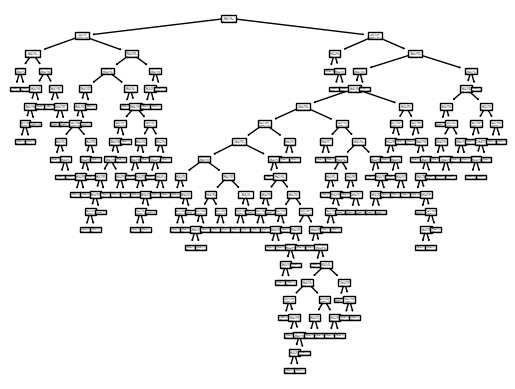

In [36]:
# plotting the tree
tree.plot_tree(clf)

In [37]:
# Predicting the results on the test dataset
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0])

In [38]:
# Evaluating the model

## Model accuracy: 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7593220338983051


In [39]:
## Model precision, recall and f1-score + cross val score, multi-class

### Precision: 
print(classification_report(y_test, y_pred))
#cross_val_score(clf, X_train, y_train, cv = 10)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       175
           1       0.71      0.70      0.70       120

    accuracy                           0.76       295
   macro avg       0.75      0.75      0.75       295
weighted avg       0.76      0.76      0.76       295



**Interpretation model evaluation (decision tree):**

0: dead (not survived)

1: alive (survived)

False positive (mono class on column "survived"): someone classified "survived", but is dead.

False negative (mono class on column "survived"): someone classified "dead", but has survived.

- Accuracy: How often is the classifier correct? Measures the overall correctness of predictions.
  Question: Did we solve the problem correctly?
- Precision: Measures the proportion of correctly predicted positive instances. Indicates at which point we can detect a class / at which point we made a mistake in predictions?
  Precision = TP/(TP+FP), refers to specificity - only on positive samples. We calculate the ratio of good positive predictions over the number of total samples predicted to be positive (True: is it well predicted? / False: did the model predict it badly?). Decreases if we have FP - based on those we classified as positives.
  Question: Among all passengers predicted as survivors, how many really survived?
- Recall: Looks like precision, but at which point we can detect all examples of a class => Could we detect everything in the database?
  It's the ratio of good positive predictions over the total number of positive observations in reality.
  Question: Among all passengers who really survived, how many survivors were predicted?
  Refers to sensitivity => At which point did we detect all of them? 
- F1-score: F1-score (F-measure) = (2*(recall*precision)) / (recall + prediction).
  It is the weighted average of precision and recall. The aim is to have a single score representative of both. 

1st tests using default parameters:
- accuracy = 0.7593220338983051 (first run), 0.7661016949152543 (2nd run) => good accuracy
- precision(0) = 81% => good precision (minimum 70-80% to be good)
  => Mono class 0: classif as dead: we are right at 81%. 
- precision(1) = 70% => Mono class 1: classif as "survived", we are right at 70%.
- recall(0) = 0.79 => good value, low number of false negatives (which one did we miss?). If someone is dead, the algo puts it as "survived" at 21%. We missed 21% of dead people.
- recall(1) = 0.73 => We missed 27% of survived people.
- f1-score(0) = 0.80 => good value, good overall performance of the classification model.
- f1-score(1) = 0.72 => good value, good overall performance of the classification model.

In [ ]:
# displaying the decision tree
dot_data = StringIO()
tree.export_graphviz(clf, out_file = dot_data,
                    filled = True, rounded = True,
                    special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../reports/figures/titanic_decision_tree_colored.png')
Image(graph.create_png())

In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[140,  35],
       [ 36,  84]])

## Confusion matrix

Technique to evaluate the performance (of the model in the case of ML) of classification

The metrics (precision, recall, etc...) use the values in the confusion matrix (TP, TN, FP, FN).

Diagonale (from top left to bottom right): True

Rest: False

**Multi-class**

Line 1: expected 0

Line 2: expected 1

Column 1: predicted 0

Column 2: predicted 1

**Mono-class:** we don't have to say that each line is independent.

Line 1: expected positive 

Line 2: expected negative

Column 1: predicted positive

Column 2: predicted negative

|               |                |
| ------------- | -------------- |
| True positive | False negative |
| False positive | True negative |

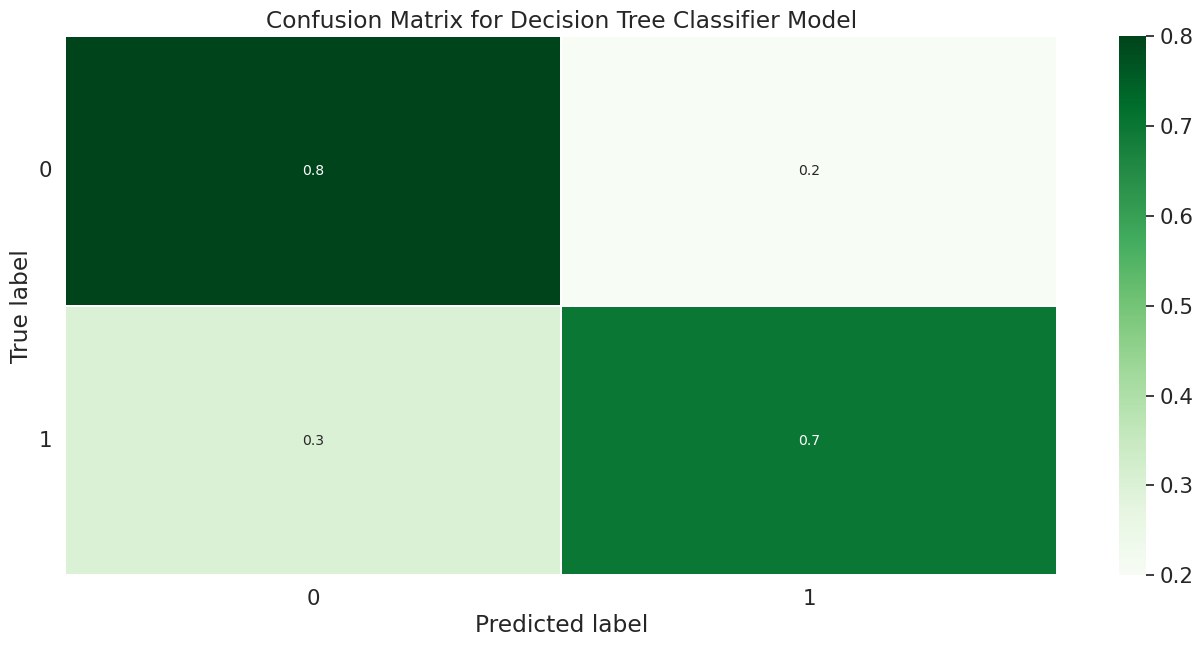

In [41]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

#### Building the plot
plt.figure(figsize = (16,7))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot = True, annot_kws = {'size':10},
           cmap = plt.cm.Greens, linewidths = 0.2)

#### Adding labels to the plot
class_names = np.array([0, 1])
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation = 0)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Decision Tree Classifier Model')
plt.savefig('../reports/figures/confusion_matrix_DTC.png')

In [101]:
# 2) Carry on with random forest

#clf2 = RandomForestClassifier(max_depth = 2, random_state = 0)
clf2 = RandomForestClassifier(n_estimators=1000, max_depth = 11, random_state=42, )
clf2.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=11, n_estimators=1000,
                       random_state=42)

In [102]:
y_pred = clf2.predict(X_test)
y_pred
#print(clf2.predict(X_test))

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0])

In [103]:
# Measuring the metrics for random forest classifier

### View accuracy score
accuracy_score(y_test, y_pred) # => 0.7728813559322034 ; 0.8169491525423729 with default parameters

0.8135593220338984

In [104]:
### View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       175
           1       0.85      0.66      0.74       120

    accuracy                           0.81       295
   macro avg       0.82      0.79      0.80       295
weighted avg       0.82      0.81      0.81       295



Interpretation of the results for Random Forest Classifier:

1st test using default parameters:

- Accuracy = 0.8169491525423729 => good accuracy
- Precision(0) = 0.80
- Precision(1) = 0.82 => good precision: among all passengers who are predicted as survivors, 80-82% really survived.  
- Recall(0) = 0.91 => good value: among all passengers who really died, we predicted 91% dead people. 
- Recall(1) = 0.67 => low value: among all passengers who really survived, we predicted 67% survivors.
- F1-score(0) = 0.85 
- F1-score(1) = 0.74 => good values, good overall performance of the model

In [46]:
### Confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred)
## TP FP
## FN TN

array([[160,  15],
       [ 40,  80]])

In [ ]:
#### Plotting the confusion matrix
#### Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

#### Building the plot
plt.figure(figsize = (16,7))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot = True, annot_kws = {'size':10},
           cmap = plt.cm.Greens, linewidths = 0.2)

#### Adding labels to the plot
class_names = np.array([0, 1])
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation = 0)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.savefig('../reports/figures/confusion_matrix_RFC_with_default_parameters.png')
#plt.show()

In [47]:
# 3) kNN
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
y_pred = neigh.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0])

In [49]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
neigh.score(X_test,y_test)

0.6338983050847458

In [50]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[138,  37],
       [ 71,  49]])

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

#### Building the plot
plt.figure(figsize = (16,7))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot = True, annot_kws = {'size':10},
           cmap = plt.cm.Greens, linewidths = 0.2)

#### Adding labels to the plot
class_names = np.array([0, 1])
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation = 0)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for k-Nearest Neighbors Model')
plt.savefig('../reports/figures/confusion_matrix_KNN.png')

In [51]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,138,37,175
1,71,49,120
All,209,86,295


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       175
           1       0.57      0.41      0.48       120

    accuracy                           0.63       295
   macro avg       0.62      0.60      0.60       295
weighted avg       0.62      0.63      0.62       295



Interpretation of the results (k = 3):

- accuracy = score = 0.6338983050847458, 63% => not so good 
- precision(0) = 66% => not so good
- precision(1) = 57%  => low value
- recall(0) = 79%  => good
- recall(1) = 41% = > low
- f1-score(0) = 72% => good
- f1-score(1) = 48% => low

# ROC curves and AUC 

ROC: Receiver Operating Characteristics

AUC: Area Under the Curve

Very important metric used to measure the classification model's performance.

=> How much the model is able to distinguish the different classes? (the higher the AUC, the better is the model to distinguish classes (particularly binary ones), for example disease / not disease)

ROC curve: TPR (True Positive Rate = sensitivity = recall, y axis) against FPR (False Positive Rate, x axis).

Perfect model: AUC = 1

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [ ]:
neigh2 = NearestNeighbors(n_neighbors=1)
neigh2.fit(X_train, y_train)

In [ ]:
y_pred = neigh2.kneighbors(X_test)
y_pred

In [ ]:
neigh2.kneighbors(X_test, return_distance=False)

In [ ]:
A = neigh2.kneighbors_graph(X_test)
A.toarray()

In [ ]:
clf3 = Pipeline(steps = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors = 11))])

In [ ]:
# See how to proceed here

# _, axs = plt.subplots(ncols=2, figsize=(12, 5))

# for ax, weights in zip(axs, ("uniform", "distance")):
#     clf3.set_params(knn__weights=weights).fit(X_train, y_train)
#     disp = DecisionBoundaryDisplay.from_estimator(
#         clf3,
#         X_test,
#         response_method="predict",
#         plot_method="pcolormesh",
#         xlabel=X.feature_names[0],
#         ylabel=X.feature_names[1],
#         shading="auto",
#         alpha=0.5,
#         ax=ax,
#     )
#     scatter = disp.ax_.scatter(X_train, c=y, edgecolors="k")
#     disp.ax_.legend(
#         scatter.legend_elements()[0],
#         X_train.target_names,
#         loc="lower left",
#         title="Classes",
#     )
#     _ = disp.ax_.set_title(
#         f"3-Class classification\n(k={clf3[-1].n_neighbors}, weights={weights!r})"
#     )

# plt.show()

In [ ]:
# 4) Logistic regression

clf4 = LogisticRegression().fit(X_train, y_train)
y_pred = clf4.predict(X_test)
y_pred

In [ ]:
clf4.predict_proba(X_test)

In [ ]:
clf4.score(X_test, y_test)

In [ ]:
accuracy_knn = metrics.accuracy_score(y_test, y_pred)
accuracy_knn

In [ ]:
print(classification_report(y_test,y_pred))

Interpretation of the results:

- accuracy = 80% => really good 
- precision(0) = 80% => really good
- precision(1) = 80% => really good
- recall(0) = 89% => very good
- recall(1) = 68% => quite good
- f1-score(0) => 84% => very good
- f1-score(1) => 74% => good

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

#### Building the plot
plt.figure(figsize = (16,7))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot = True, annot_kws = {'size':10},
           cmap = plt.cm.Greens, linewidths = 0.2)

#### Adding labels to the plot
class_names = np.array([0, 1])
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation = 0)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.savefig('../reports/figures/confusion_matrix_logistic_regression.png')

In [ ]:
# 5) SVM classification
clf5 = svm.SVC()
clf5.fit(X_train, y_train)

In [ ]:
y_pred = clf5.predict(X_test)
y_pred

In [ ]:
support_vectors = clf5.support_vectors_
support_vectors

In [ ]:
# Evaluating the SVM model

### Accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred)
accuracy_svm

In [ ]:
### Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

In [ ]:
# 6) Naive Bayes
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

#### Building the plot
plt.figure(figsize = (16,7))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot = True, annot_kws = {'size':10},
           cmap = plt.cm.Greens, linewidths = 0.2)

#### Adding labels to the plot
class_names = np.array([0, 1])
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation = 0)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.savefig('../reports/figures/confusion_matrix_naives_bayes.png')

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

In [ ]:
# True Positive rate

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

In [ ]:
# False Positive rate

false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

In [ ]:
# Specificity

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of survived/dead persons')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of survived/dead persons')
plt.ylabel('Frequency')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = '...')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting if a person survived or not')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# ROC and AUC metrics
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

In [ ]:
Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

In [ ]:
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

In [ ]:
# Classifier comparison

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()